# Mastodon users on Twitter (IU data)

Total of tweets collected: 720,125 (since 09/2022)

Total of users: 4,026 (we also have their mastodon usernames/instances) (original sample 5K users, 270 invalid)
~700 users with 0 tweets

 wget --recursive --no-parent https://tavern.osome.iu.edu/jobs/2023-05-04/

In [1]:
path = '../data/twitter-iu/2023-05-04/tweetContent'

In [9]:
!python -m pip install -U matplotlib

                                              0.0/7.6 MB ? eta -:--:--
     -                                        0.2/7.6 MB 4.8 MB/s eta 0:00:02
     --------                                 1.6/7.6 MB 16.4 MB/s eta 0:00:01
     ---------------------                    4.1/7.6 MB 29.3 MB/s eta 0:00:01
     --------------------------               5.1/7.6 MB 29.6 MB/s eta 0:00:01
     -----------------------------------      6.8/7.6 MB 29.0 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 28.6 MB/s eta 0:00:01
     ---------------------------------------- 7.6/7.6 MB 27.1 MB/s eta 0:00:00
                                              0.0/163.0 kB ? eta -:--:--
     -------------------------------------- 163.0/163.0 kB 9.5 MB/s eta 0:00:00
                                              0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 1.0/1.0 MB 32.3 MB/s eta 0:00:00
                                              0.0/55.4 kB ? eta -:--:--
  

In [1]:
import glob
import gzip
import json
import pandas as pd

from  datetime import date
from email.utils import parsedate_tz
from datetime import datetime, timedelta


In [2]:
path = '../data/twitter-iu/2023-05-04/tweetContent/'
files = glob.glob(path + '/*.gz')
print(files[:10])

['../data/twitter-iu/2023-05-04/tweetContent\\part-m-00000.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00001.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00002.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00003.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00004.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00005.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00006.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00007.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00008.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00009.gz']


In [4]:
'''
for file in files: 
    with gzip.open(file, mode='rb') as f:
        file_content = f.read().decode("utf-8") 
        
        outfile = open(file[:-3] + '.txt', 'w', encoding='utf-8')
        outfile.write(file_content)
        outfile.close()
'''
print()

In [3]:
tweets = []
unique_users = set()
for file in files:
    file_txt = file[:-3] + '.txt'
    for line in open(file_txt, 'r', encoding='utf-8'):
        tweet = json.loads(line)
        user_id = tweet['user']['screen_name']
        tweets.append(tweet)
        unique_users.add(user_id)


In [4]:
print(len(tweets))
print(len(unique_users))

720125
4026


In [5]:
unique_users = set()
for tweet in tweets:
    user = tweet['user']['id_str']
    unique_users.add(user)
    
print(len(unique_users))

3996


In [6]:
all_users = pd.read_csv('../data/valid_twitter_handles_2023-06-06_complete.txt', sep='\t', header=None)

print(all_users.head())

all_users = set([handler[1:] for handler in all_users[0].values])

               0
0       @anaivas
1     @agarregui
2       @Annet81
3  @Anthrobirder
4     @anthroetc


270 invalid entries

In [ ]:
missing = all_users - unique_users
print(missing)
print(len(missing))

In [29]:
today = date.today()
missing_profiles = open('../data/twitter_handles_missing_{}.txt'.format(today), 'w', encoding='utf-8')
for handler in missing:
    missing_profiles.write("{}\n".format(handler))
missing_profiles.close()


In [7]:
mastodon_topic = []
nonmastodon_topic = []
for tweet in tweets:
    text = tweet['text'].lower()
    if 'mastodon' in text:
        created_at = tweet['created_at']
        user = tweet['user']
        mastodon_topic.append((text, created_at, user))
    else:
        created_at = tweet['created_at']
        user = tweet['user']
        nonmastodon_topic.append((text, created_at, user))


In [8]:
print(len(mastodon_topic))
print(len(nonmastodon_topic))

3526
716599


In [30]:
import calendar
import numpy as np
calendar.setfirstweekday(6)

def get_week_of_month(year, month, day):
    x = np.array(calendar.monthcalendar(year, month))
    week_of_month = np.where(x==day)[0][0]
    return(week_of_month)


def to_datetime(datestring):
    time_tuple = parsedate_tz(datestring.strip())
    dt = datetime(*time_tuple[:6])
    return dt - timedelta(seconds=time_tuple[-1])

x = []
for tweet in mastodon_topic:
    d = to_datetime(tweet[1])
    month = d.month 
    year = d.year
    week = get_week_of_month(d.year, d.month, d.day)
    x.append("{}-{}-{}".format(year, month, week))

nonx = []
for tweet in nonmastodon_topic:
    d = to_datetime(tweet[1])
    month = d.month 
    year = d.year
    week = get_week_of_month(d.year, d.month, d.day)
    nonx.append("{}-{}-{}".format(year, month, week))


Tweets with occurence of word "mastodon":

['2022-10-1' '2022-10-3' '2022-10-4' '2022-10-5' '2022-11-0' '2022-11-1'
 '2022-11-2' '2022-11-3' '2022-11-4' '2022-12-0' '2022-12-1' '2022-12-2'
 '2022-12-3' '2022-12-4' '2022-8-4' '2022-9-2' '2023-1-0' '2023-1-1'
 '2023-1-2' '2023-1-3' '2023-1-4' '2023-2-0' '2023-2-1' '2023-2-2'
 '2023-2-3' '2023-2-4' '2023-3-0' '2023-3-1' '2023-3-2' '2023-3-3'
 '2023-3-4' '2023-4-0' '2023-4-1' '2023-4-2' '2023-4-3' '2023-4-4'
 '2023-4-5' '2023-5-0']


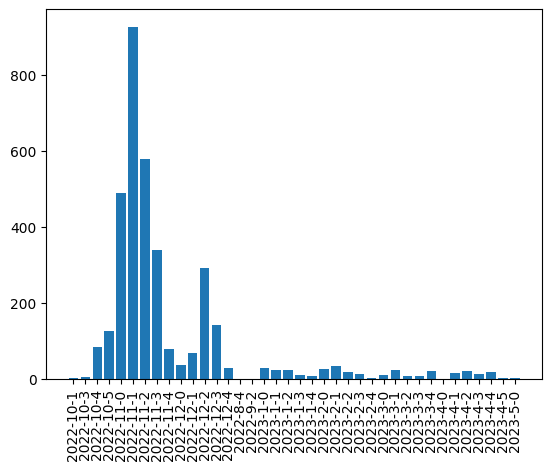

In [31]:
import numpy as np
import matplotlib.pyplot as plt

u1, c1 = np.unique(x, return_counts=True)

print(u1)

mast_map = dict()
for a,b in zip(u1, c1):
    mast_map[a] = b

_ = plt.bar(u1, c1)
_ = plt.xticks(rotation=90)

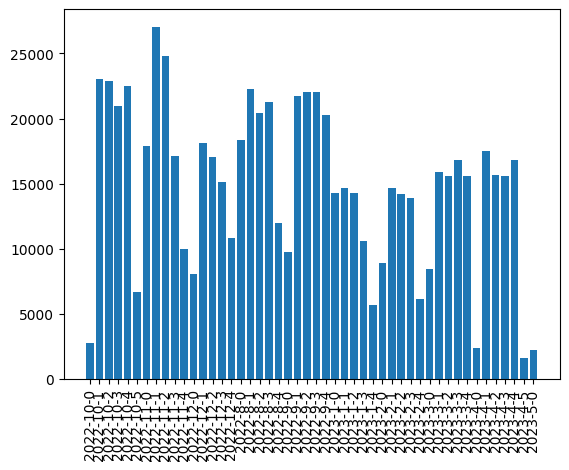

In [32]:
import numpy as np
import matplotlib.pyplot as plt

u2, c2 = np.unique(nonx, return_counts=True)

nonmast_map = dict()
for a,b in zip(u2, c2):
    nonmast_map[a] = b

_ = plt.bar(u2, c2)
_ = plt.xticks(rotation=90)

In [45]:
print(nonmast_map.keys())
X = []
Y_total = []
Y_x = []
Y_nonx = []
for month_year in ['2022-10', '2022-11', '2022-12', '2023-1', '2023-2', '2023-3', '2023-4', '2023-5']:
    for week in range(1, 5):
        yyyy_mm_dd = "{}-{}".format(month_year, week)
        X.append(yyyy_mm_dd)
        total = 0
        if yyyy_mm_dd in nonmast_map:
            Y_nonx.append(nonmast_map[yyyy_mm_dd])
            total += nonmast_map[yyyy_mm_dd]
        else:
            Y_nonx.append(0)

        if yyyy_mm_dd in mast_map:
            Y_x.append(mast_map[yyyy_mm_dd])
            total += mast_map[yyyy_mm_dd]
        else:
            Y_x.append(0)

        Y_total.append(total)

dict_keys(['2022-10-0', '2022-10-1', '2022-10-2', '2022-10-3', '2022-10-4', '2022-10-5', '2022-11-0', '2022-11-1', '2022-11-2', '2022-11-3', '2022-11-4', '2022-12-0', '2022-12-1', '2022-12-2', '2022-12-3', '2022-12-4', '2022-8-0', '2022-8-1', '2022-8-2', '2022-8-3', '2022-8-4', '2022-9-0', '2022-9-1', '2022-9-2', '2022-9-3', '2022-9-4', '2023-1-0', '2023-1-1', '2023-1-2', '2023-1-3', '2023-1-4', '2023-2-0', '2023-2-1', '2023-2-2', '2023-2-3', '2023-2-4', '2023-3-0', '2023-3-1', '2023-3-2', '2023-3-3', '2023-3-4', '2023-4-0', '2023-4-1', '2023-4-2', '2023-4-3', '2023-4-4', '2023-4-5', '2023-5-0'])


In [46]:

X

['2022-10-1',
 '2022-10-2',
 '2022-10-3',
 '2022-10-4',
 '2022-11-1',
 '2022-11-2',
 '2022-11-3',
 '2022-11-4',
 '2022-12-1',
 '2022-12-2',
 '2022-12-3',
 '2022-12-4',
 '2023-1-1',
 '2023-1-2',
 '2023-1-3',
 '2023-1-4',
 '2023-2-1',
 '2023-2-2',
 '2023-2-3',
 '2023-2-4',
 '2023-3-1',
 '2023-3-2',
 '2023-3-3',
 '2023-3-4',
 '2023-4-1',
 '2023-4-2',
 '2023-4-3',
 '2023-4-4',
 '2023-5-1',
 '2023-5-2',
 '2023-5-3',
 '2023-5-4']

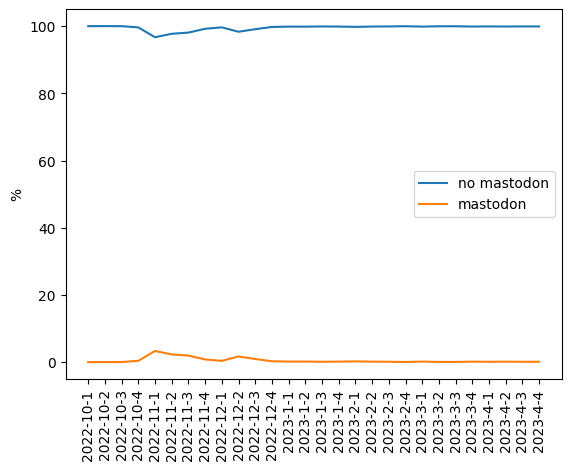

In [61]:
xperc = []
nonperc = []
x_nonzero = []
for x, non,mast,total in zip(X, Y_nonx, Y_x, Y_total):
    if total == 0:
        continue
    x_nonzero.append(x)
    xperc.append(100*mast/total)
    nonperc.append(100*non/total)

# plt.plot(X, Y_total, label='total')
plt.plot(x_nonzero, nonperc, label='no mastodon')
plt.plot(x_nonzero, xperc, label='mastodon')
plt.ylabel('%')
plt.legend()
_ = plt.xticks(rotation=90)
plt.savefig('tweets-mastodon.png',bbox_inches="tight")